## BLINKIT DATA ANALYSIS BY USING PYTHON

### Imported Libraraies

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Imported Raw Data

In [6]:
df = pd.read_csv("D:\\DATA ANLYTICS PROJECTS\\blinkit_data.csv")

### Sample Data

In [7]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


### Size of Data

In [8]:
print("size of data: ",df.shape)

size of data:  (8523, 12)


### Data Columns

In [9]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### Data Types

In [10]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### Data Cleaning

In [11]:
df['Item Fat Content']= df['Item Fat Content'].replace({'LF' : 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'})

In [12]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### BUSINESS REQUIREMENTS

### KPI'S REQUIREMENTS

In [13]:
#Total Sales
Total_Sales = df['Sales'].sum()

#Total Sales
Average_Sales = df['Sales'].mean()

#Minimum Sales
Minimum_Sales = df['Sales'].min()

#Number of Items Sold
Total_Items_Sold = df['Sales'].count()

#Average Rating
Average_Rating = df['Rating'].mean()

#Display
print(f"Total Sales: ${Total_Sales:,.1f}")
print(f"Average Sales: ${Average_Sales:,.1f}")
print(f"Minimum Sales: ${Minimum_Sales:,.1f}")
print(f"Total Items Sold: {Total_Items_Sold:,.0f}")
print(f"Average Rating: {Average_Rating:,.1f}")

Total Sales: $1,201,681.5
Average Sales: $141.0
Minimum Sales: $31.3
Total Items Sold: 8,523
Average Rating: 4.0


### CHART REPRESENTATIONS

#### Total Sales by Fat Content

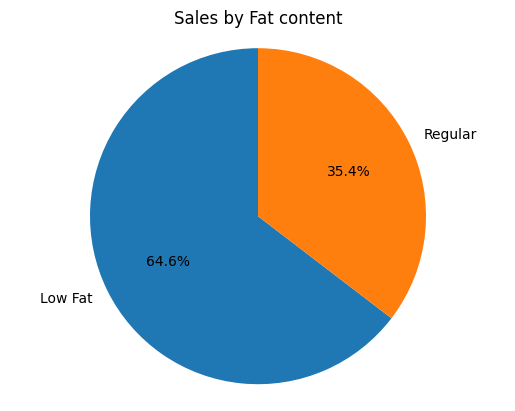

In [14]:
Sales_by_Fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(Sales_by_Fat, labels = Sales_by_Fat.index,
                            autopct = '%.1f%%',
                            startangle = 90)
plt.title('Sales by Fat content')
plt.axis('equal')
plt.show()

#### Total Sales by Item Type

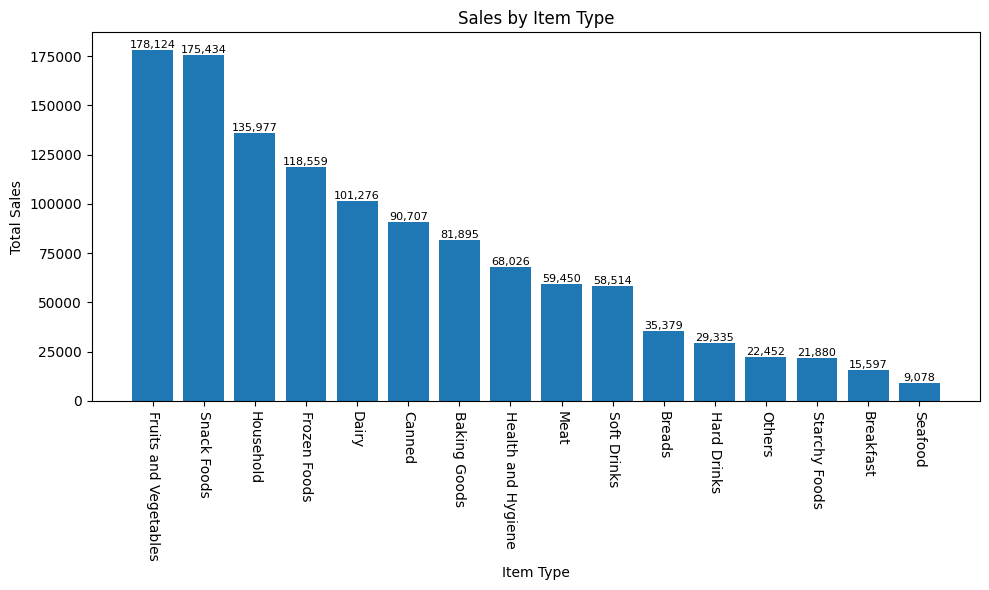

In [15]:
Sales_by_Item_Type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize =(10,6))
bars = plt.bar(Sales_by_Item_Type.index, Sales_by_Item_Type.values)

plt.xticks(rotation= -90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x()+ bar.get_width()/2, bar.get_height(),
              f'{bar.get_height():,.0f}', ha='center', va ='bottom' , fontsize = 8)

plt.tight_layout()
plt.show()

#### Fat Content by Outlet Total Sales

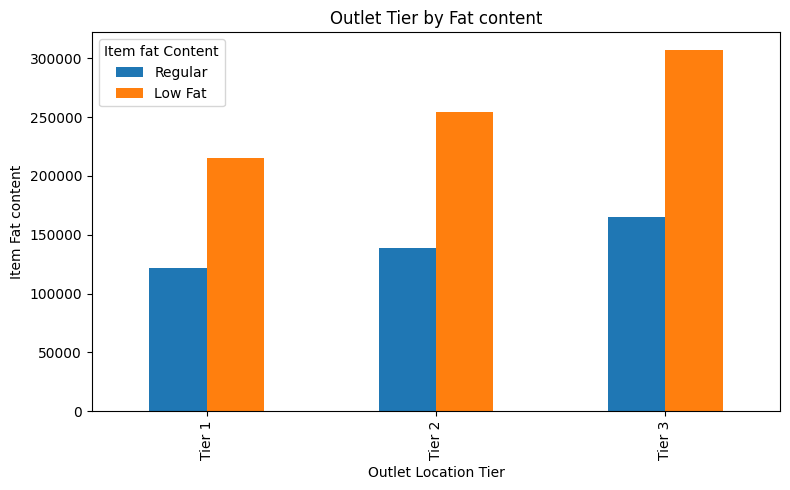

In [16]:
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind ='bar', figsize=(8,5), title=('Outlet Tier by Fat content'))

plt.xlabel('Outlet Location Tier')
plt.ylabel('Item Fat content')
plt.legend(title='Item fat Content')
plt.tight_layout()
plt.show()


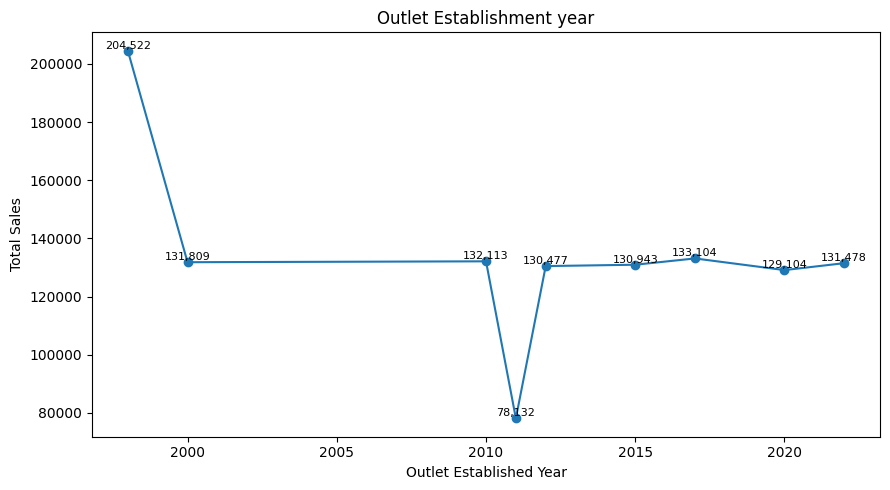

In [17]:
Sales_by_Year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(Sales_by_Year.index, Sales_by_Year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Established Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment year')

for x,y in zip(Sales_by_Year.index, Sales_by_Year.values):
    plt.text(x,y, f'{y:,.0f}', ha = 'center' , va = 'bottom', fontsize = 8)

plt.tight_layout()
plt.show()

#### Sales by Outlet Size

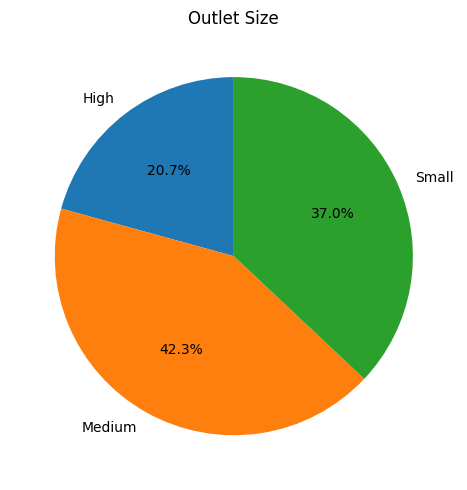

In [18]:
Sales_by_Outlet_Size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(5,5))
plt.pie(Sales_by_Outlet_Size, labels = Sales_by_Outlet_Size.index, autopct = '%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()
    

#### Sales by Outlet Location

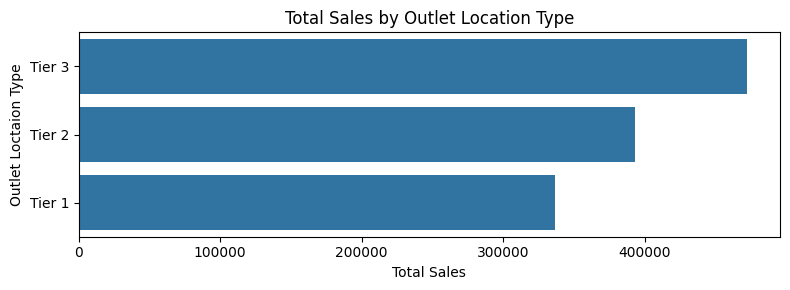

In [19]:
Sales_by_Location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
Sales_by_Location = Sales_by_Location.sort_values('Sales' ,ascending=False)

plt.figure(figsize=(8,3))
ax = sns.barplot(x = 'Sales' , y = 'Outlet Location Type', data= Sales_by_Location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Loctaion Type')
plt.tight_layout()
plt.show()